### 산점도 그래프
- 두개의 컬럼/변수의 관계를 시각화하여 표현
- 연속형/수치형 데이터에 사용함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
# 데이터 준비
file_path = '../data/auto_mpg.csv'
font_path = r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\font\NanumMyeongjo.ttf'

In [3]:
# 미리 지정하고 넘어가는 폰트

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [5]:
# 데이터 프레임
data_df = pd.read_csv(file_path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
# - 컬럼별 타입 확인
data_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
# 연비와 관련이 높은 컬럼 즉, 변수 확인
# - 상관계수 확인
corr_sr = data_df.corr(numeric_only=True)['mpg']
corr_sr

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [11]:
# mpg와 weight의 상관관계 값
round(corr_sr['weight'], 2)

np.float64(-0.83)

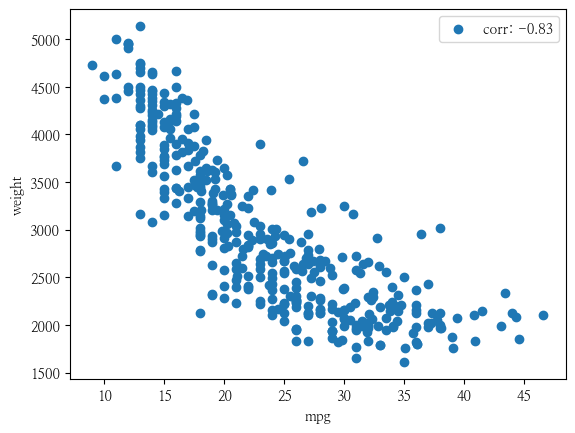

In [12]:
# 산점도 그래프 그리기
plt.scatter(data_df['mpg'], data_df['weight'], label=f"corr: {round(corr_sr['weight'], 2)}")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

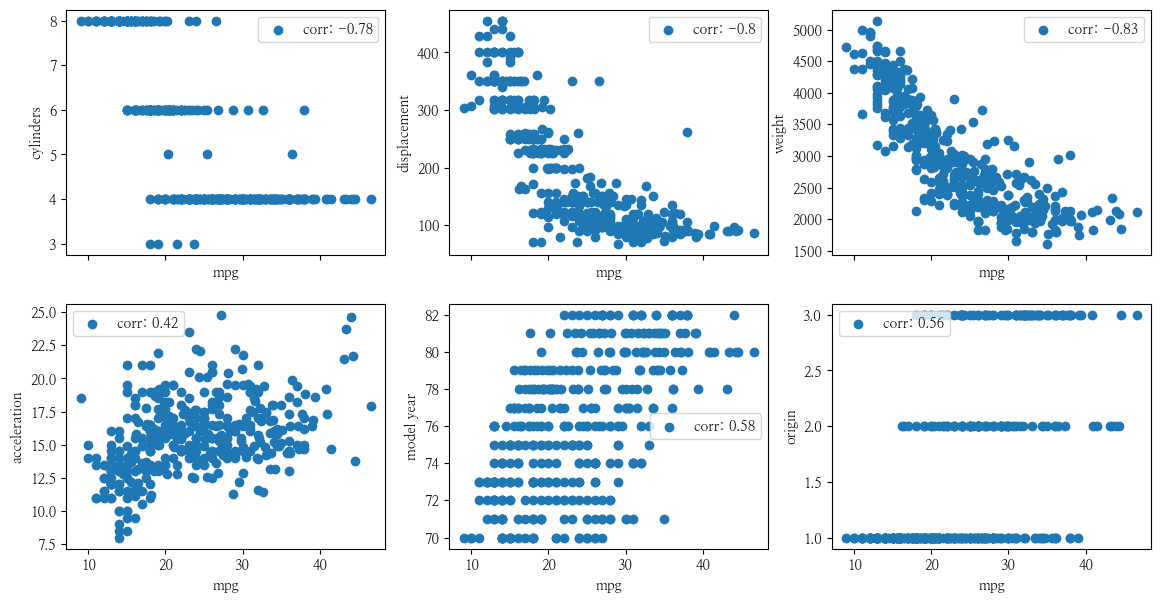

In [16]:
# mpg 컬럼과 다른 컬럼간의 관계 시각화
# - 그래프 담을 창 생성
fig = plt.figure(figsize=(14,7))

# - 그래프를 담을 공간 생성 : axes
axes = fig.subplots(2, 3, sharex=True)
for row in range(2):
    for col in range(3):
        col_name = corr_sr.index[row*3 + col + 1]
        axes[row, col].scatter(data_df['mpg'], data_df[col_name],
                               label=f"corr: {round(corr_sr[col_name], 2)}")

        axes[row, col].set_xlabel('mpg')
        axes[row, col].set_ylabel(corr_sr.index[row*3+col+1])
        axes[row, col].legend()

In [ ]:
# 위의 그래프를 스스로 그려보자.
# mpg와 다른 칼럼과의 상관관계
